# Analyzing Stock Market Data to Build a Portfolio

## Project Goal

### Analyze share price data from various listings to answer the following questions:

1. What kind of Growth % do we expect from the various listings? <br>
2. How do the Growth % of the different listings correlate to each other? <br>
3. What is the estimated listing share price at a future date (prediction)? <br>
4. What kind of volatility do the listings have? <br>
5. How can we use our analysis to form a balanced investment portfolio? <br>

### Overall Methodology:

1. Import and organize data for the various listings <br>
2. Make observations about the data <br>
3. Use these observations to answer the questions <br>

## References

Share price information obtained from: [Yahoo Finance](https://finance.yahoo.com/) <br>
Yahoo Finance library: [yfinance](https://pypi.org/project/yfinance/) <br>

## Inputs

### Below are the inputs to perform the analysis

In [1]:
s_list='AM AAPL FB NVDA MSFT PYPL TSLA ZNGA BABA FCAU F TOPS AAL UAL BA INO NIO GLDG WKHS MVIS MRNA LI GILD SOLO BAC JPM COST GPRO TTNP LYFT CRWD JMIA GE MTCH ZG LAC'  # List of "listings" to be analyzed
total_investment=7001  # Total investment value in USD
sample_interval ='1d'  # Time interval to fetch data at
start='11/27/2020'  # Start date of interest
end='12/29/2020'  # End date of interest
datetime_query=['12/28/2020'] # Datetime query values (for prediction)
pricetype='Close' # Open, Close, Low, High

## Import Libraries

In [2]:
# Python Version
import sys
sys.version

'3.6.12 | packaged by conda-forge | (default, Dec  9 2020, 00:36:02) \n[GCC 9.3.0]'

In [3]:
#Update python standard libraries install
!pip install --upgrade pip

# library to for array handling
import numpy as np 

# library for dataframes
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Linear Model
import sklearn as sk

# List Functions module
!pip install listfun
from listfun import Listoper as lst

# Math Module
import math

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# Machine-Learning and analysis modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

! pip install expsolver;
from expsolver import Solver as solve

# Module to handle XML and HTML 
! pip install lxml;

#Finance information import (Link in "Yahoo Finance" Markdown Cell in the "References" Section)
!pip install yfinance;
import yfinance as yf;

print('Libraries imported.')

Libraries imported.


## Import Data into DataFrame

In [4]:
end=pd.to_datetime(end)
#start=end-pd.to_timedelta(start)
start=pd.to_datetime(start)
print('Start: {}, End: {}'.format(start,end))

Start: 2020-11-27 00:00:00, End: 2020-12-29 00:00:00


### Create basic dataframe "df_info" containing all the available stocks information

In [5]:
# Create list of stock names as specified by the User
s_list=s_list.split(' ')

In [6]:
# Initialize Basic Dataframe as empty
df_info=pd.DataFrame() 

# Add Shares information for List of stock names
for item in s_list:
    data=yf.Ticker(item)
    df_data=data.history(period=sample_interval,start=start ,end=end )
    df_data=df_data.reset_index()
    df_data['Name']=pd.DataFrame([item for i in range(0,len(df_data))])
    df_info=pd.concat([df_info,df_data])
    

# Display basic information
df_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
0,2020-11-27,7.11,7.230,6.96,6.97,1942700,0.0,0.0,AM
1,2020-11-30,7.00,7.140,6.68,6.74,6180500,0.0,0.0,AM
2,2020-12-01,6.91,6.990,6.56,6.71,4219800,0.0,0.0,AM
3,2020-12-02,6.71,7.215,6.66,6.97,5154200,0.0,0.0,AM
4,2020-12-03,7.08,7.305,6.91,7.27,6597800,0.0,0.0,AM


In [7]:
# Size of Data:
print('Size of the full dataset is: {} by {}'.format(df_info.shape[0],df_info.shape[1]))

Size of the full dataset is: 756 by 9


## Exploratory Pre-Processing Analysis

### Create Dataframe (df) of Relevant share Price vs. date, which will be the data looked at in this analysis  

In [8]:
# Create new Dataframe of relevant Share Prices
datevalues=df_info['Date'].sort_values().drop_duplicates().tolist()
df=pd.DataFrame(index=datevalues,columns=s_list)
for item in s_list:
    df_item=df_info[df_info['Name']==item]
    for ind in df.index.tolist():
    #df[['Date',item]]=df_info.loc[df_info['Name']==item,['Date',pricetype]]
        try:
            df.loc[ind,item]=df_item.loc[df_item['Date']==ind,pricetype].values[0]
        except:
            pass
    df[item].fillna(method='bfill',inplace=True)
    df[item].fillna(method='ffill',inplace=True)

df_price=df
# Display initial few contents of the Dataset
df.tail(10)

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM,COST,GPRO,TTNP,LYFT,CRWD,JMIA,GE,MTCH,ZG,LAC
2020-12-14,7.89,121.779999,274.190002,532.349976,214.199997,220.789993,639.830017,8.71,256.029999,16.770000,8.91,1.28,16.700001,46.720001,228.619995,10.41,40.980000,2.15,21.389999,3.13,155.070007,31.330000,59.840000,6.31,28.219999,118.300003,374.380005,8.71,3.28,46.770000,173.800003,37.029999,10.820046,144.809998,137.649994,9.00
2020-12-15,8.22,127.879997,275.549988,534.419983,214.130005,221.600006,633.250000,9.12,255.110001,17.250000,9.15,1.29,17.010000,47.459999,229.500000,10.92,43.500000,2.32,21.850000,4.21,147.220001,32.150002,59.430000,6.81,28.639999,120.320000,371.880005,8.81,3.47,49.299999,174.929993,36.290001,11.099789,150.839996,138.080002,9.71
2020-12-16,7.96,127.809998,275.670013,529.700012,219.279999,230.199997,622.770020,9.52,261.890015,17.549999,9.04,1.27,16.860001,46.000000,225.869995,10.44,44.669998,2.35,21.270000,4.01,137.029999,31.360001,58.939999,6.55,28.719999,120.669998,369.440002,8.77,3.26,49.910000,179.789993,39.290001,10.919954,153.899994,140.270004,9.50
2020-12-17,8.13,128.699997,274.480011,533.650024,219.419998,235.509995,655.900024,9.61,264.429993,17.680000,9.08,1.23,16.799999,45.880001,221.240005,10.72,46.000000,2.40,21.170000,4.99,144.000000,30.690001,59.070000,6.96,28.830000,119.669998,370.290009,8.74,3.29,49.470001,185.250000,39.139999,10.870000,148.750000,142.889999,9.37
2020-12-18,8.28,126.660004,276.399994,530.880005,218.589996,236.449997,695.000000,9.94,260.000000,17.760000,8.95,1.20,16.510000,44.740002,219.750000,10.39,46.720001,2.32,21.150000,5.05,140.229996,31.770000,59.080002,7.29,28.670000,119.080002,367.000000,8.86,3.16,49.980000,203.750000,42.509998,10.810000,155.070007,140.149994,9.34
2020-12-21,8.24,128.229996,272.790009,533.289978,222.589996,237.720001,649.859985,9.87,260.429993,17.540001,8.93,1.19,16.100000,44.060001,219.309998,10.33,48.950001,2.34,20.660000,5.77,138.300003,32.860001,58.540001,7.40,29.740000,123.550003,364.970001,8.55,3.28,49.910000,210.649994,41.759998,10.770000,154.149994,141.360001,9.36
2020-12-22,8.41,131.880005,267.089996,531.130005,223.940002,243.490005,640.340027,9.99,255.830002,17.790001,8.79,1.18,15.480000,42.970001,218.779999,9.90,47.580002,2.22,23.299999,9.27,125.879997,31.290001,57.000000,7.36,29.209999,121.669998,362.029999,8.69,3.19,49.509998,224.899994,47.669998,10.610000,156.119995,146.690002,11.35
2020-12-23,8.44,130.960007,268.109985,520.369995,221.020004,239.440002,645.979980,9.93,256.179993,17.820000,8.99,1.23,15.890000,44.110001,219.690002,10.07,47.009998,2.29,22.725000,6.65,130.339996,30.559999,57.380001,7.01,30.049999,125.070000,361.890015,8.62,3.27,50.070000,223.500000,46.439999,10.860000,153.389999,145.940002,12.43
2020-12-24,8.38,131.970001,267.399994,519.750000,222.750000,238.639999,661.770020,9.91,222.000000,17.680000,8.86,1.24,15.660000,43.259998,217.149994,10.26,45.770000,2.30,22.969999,6.55,123.389999,29.320000,57.070000,6.95,29.959999,124.519997,364.579987,8.51,3.26,48.860001,221.119995,43.619999,10.650000,152.080002,143.860001,12.31
2020-12-28,7.69,136.690002,277.000000,516.000000,224.960007,235.729996,663.690002,9.73,222.360001,18.000000,8.89,1.21,16.059999,43.919998,216.089996,9.60,44.060001,2.22,21.320000,6.71,111.400002,27.010000,56.889999,6.60,30.129999,125.339996,371.059998,8.55,3.10,49.770000,212.550003,40.360001,10.640000,150.080002,138.339996,12.33


### Display basic information about this dataset

In [9]:
# Display basic statistics of the opening prices
# Darker cells denote higher values
df.describe().style.background_gradient(axis=1).format("{:.2f}")

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM,COST,GPRO,TTNP,LYFT,CRWD,JMIA,GE,MTCH,ZG,LAC
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,7.81,125.46,276.98,530.38,216.96,223.88,625.76,9.06,258.90,16.85,9.09,1.27,16.23,46.43,224.84,11.19,45.92,2.24,22.25,4.02,144.05,32.24,59.29,7.06,29.00,121.31,372.83,8.38,3.55,46.60,181.07,37.46,10.77,147.44,127.96,10.52
std,0.58,4.83,5.77,8.44,4.14,11.19,33.99,0.65,13.12,0.80,0.17,0.12,1.05,2.23,8.43,0.97,2.91,0.09,1.74,1.98,14.53,2.54,1.24,0.45,0.57,2.06,6.71,0.55,0.59,3.79,25.62,5.08,0.33,5.49,14.16,1.08
min,6.71,116.59,267.09,516.00,210.52,210.80,567.60,8.23,222.00,15.50,8.79,1.12,14.13,42.97,210.71,9.60,40.98,2.08,20.43,2.30,111.40,27.01,56.89,6.31,27.99,117.88,361.89,6.99,3.10,38.17,141.84,27.81,10.14,138.93,110.35,9.00
25%,7.50,122.41,274.19,520.53,214.20,214.54,599.04,8.62,256.18,16.19,8.95,1.19,15.66,44.74,218.78,10.39,44.06,2.19,21.17,2.63,137.03,31.29,58.94,6.85,28.67,119.74,369.44,8.32,3.27,46.10,166.17,33.34,10.61,143.52,111.88,9.50
50%,7.89,123.75,276.97,532.35,215.37,217.93,633.25,8.84,263.36,16.72,9.08,1.23,16.40,46.00,223.85,11.06,45.36,2.22,21.39,2.82,144.00,31.77,59.77,6.97,28.88,121.22,373.33,8.62,3.37,47.53,175.92,37.03,10.82,147.32,129.03,10.43
75%,8.28,128.23,279.70,535.44,219.42,235.73,649.86,9.73,264.54,17.68,9.21,1.29,17.01,48.36,232.06,12.17,47.01,2.30,22.73,5.05,155.69,32.86,60.15,7.36,29.21,122.04,375.10,8.71,3.52,49.51,203.75,40.36,10.92,152.08,140.27,11.35
max,8.44,136.69,287.52,544.27,224.96,243.49,695.00,9.99,276.48,18.00,9.45,1.65,17.99,49.91,238.17,12.60,54.00,2.40,27.18,9.27,169.86,39.48,60.87,8.27,30.13,125.34,387.56,8.86,5.40,50.07,224.90,47.67,11.38,156.12,146.69,12.43


### Create basic Time plot to look at pertinent information

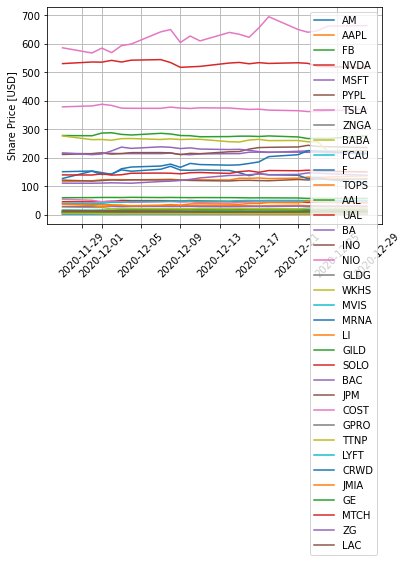

In [10]:
# Plot Open price vs. Time
ax= plt.subplot()
for item in df_price.columns:
    plt.plot(df_price[item])

plt.xticks(rotation=45)
ax.legend(df_price.columns)
plt.ylabel('Share Price [USD]')
ax.grid(True)

## What kind of Growth % do we see with the various listings?

### Normalize the opening price to determine Growth % over the period of interest

Normalize w.r.t. start price (df_start) <br> 
Normalization used: (price-start_price)/start_price*100 to obtain df_norm

In [11]:
# Normalization Function
def df_normalize(df):
    df_strt=df.iloc[0,:]
    df_norm=(df.iloc[:,:]-df_strt)/df_strt*100
    df_strt=pd.DataFrame(df_strt).transpose()
    df_strt.set_axis(['start_price'],axis=0,inplace=True)
    return [df_norm,df_strt]

# Store Normalized values in DataFrame and display results                          
[df_norm,df_start]=df_normalize(df)
df_norm.head()

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM,COST,GPRO,TTNP,LYFT,CRWD,JMIA,GE,MTCH,ZG,LAC
2020-11-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-11-30,-3.299857,2.109964,-0.302364,1.057592,-0.538953,1.291450,-3.100252,0.243019,-4.745379,-2.022754,-0.110014,-4.098366,-5.674229,-0.551876,-2.674362,-0.326264,-6.425928,-3.255822,-6.659306,0.434782,20.239319,-8.839914,1.066137,-9.673526,-2.863059,-2.755324,0.870253,-2.374303,-5.555462,-2.228491,1.624343,-12.794799,-2.115378,-0.300794,-0.226040,-2.256946
2020-12-01,-3.730269,5.257745,3.146032,0.970866,0.455332,2.436252,-0.170718,0.121509,-4.510272,1.201015,1.650161,-8.196723,-4.739647,0.044151,-1.612012,1.305056,-15.999999,1.860463,-7.174396,6.521743,11.005271,-11.702125,1.815758,-15.719475,-1.034839,-1.220923,2.400074,4.189947,-30.370372,1.460040,-2.207785,-24.613717,-2.403846,2.635531,0.289331,-0.520837
2020-12-02,0.000000,5.566520,3.495192,2.135924,0.065046,0.553478,-2.891970,1.093562,-5.483219,0.948171,1.210117,-4.918038,-0.801067,3.156734,3.394922,-2.365416,-11.148149,6.976737,-24.834437,3.913050,12.571835,-11.980749,1.832422,-15.840391,0.241464,0.676456,1.327352,8.798884,-35.000001,11.168034,-5.960356,-11.358088,0.288467,-0.501334,1.157323,-5.989588
2020-12-03,4.304164,5.446442,1.454234,1.045967,-0.459969,1.490134,1.300873,2.308634,-3.461374,0.632114,1.320131,-2.459014,7.409884,10.176602,9.561200,2.120720,-16.018521,3.255811,-16.593084,3.478268,23.797525,-18.161090,1.382645,-15.598553,0.345588,0.016496,-1.169505,13.407822,-32.592592,10.399584,6.868660,-9.623202,1.923082,0.365247,0.488247,-9.461807


In [12]:
df_start

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM,COST,GPRO,TTNP,LYFT,CRWD,JMIA,GE,MTCH,ZG,LAC
start_price,6.97,116.589996,277.809998,530.293335,215.229996,211.389999,585.76001,8.23,276.480011,15.82,9.09,1.22,14.98,45.299999,216.5,12.26,54.0,2.15,27.18,2.3,127.029999,39.48,59.35817,8.27,28.810434,121.220001,378.476288,7.16,5.4,39.040001,150.830002,36.889999,10.390441,139.630005,110.599998,11.52


In [13]:
# Size of Data:
print('Size of the data is: {} by {}'.format(df_norm.shape[0],df_norm.shape[1]))

Size of the data is: 21 by 36


In [14]:
# Display basic statistics of the normalized prices
# Darker cells denote higher values
df_norm.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM,COST,GPRO,TTNP,LYFT,CRWD,JMIA,GE,MTCH,ZG,LAC
count,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
mean,12.0,7.6,-0.3,0.0,0.8,5.9,6.8,10.1,-6.4,6.5,-0.0,3.9,8.3,2.5,3.8,-8.7,-15.0,4.2,-18.1,74.6,13.4,-18.4,-0.1,-14.6,0.7,0.1,-1.5,17.0,-34.2,19.4,20.0,1.6,3.7,5.6,15.7,-8.7
min,-3.7,0.0,-3.9,-2.7,-2.2,-0.3,-3.1,0.0,-19.7,-2.0,-3.3,-8.2,-5.7,-5.1,-2.7,-21.7,-24.1,-3.3,-24.8,0.0,-12.3,-31.6,-4.2,-23.7,-2.9,-2.8,-4.4,-2.4,-42.6,-2.2,-6.0,-24.6,-2.4,-0.5,-0.2,-21.9
max,21.1,17.2,3.5,2.6,4.5,15.2,18.6,21.4,0.0,13.8,4.0,35.2,20.1,10.2,10.0,2.8,0.0,11.6,0.0,303.0,33.7,0.0,2.5,0.0,4.6,3.4,2.4,23.7,0.0,28.3,49.1,29.2,9.5,11.8,32.6,7.9


### Plot trends in Normalized values

Time Plot

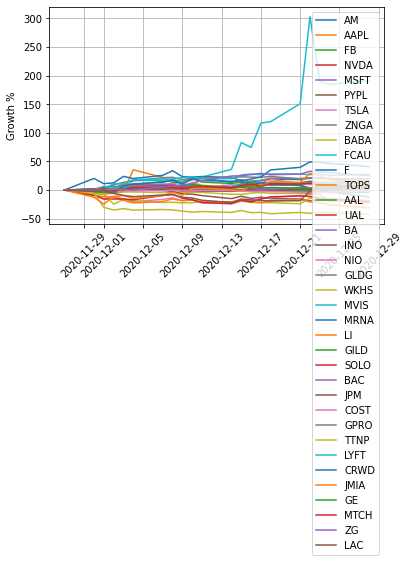

In [15]:
# Display Growth % over time
ax= plt.subplot()
for item in df_norm.columns:
    plt.plot(df_norm[item])

plt.xticks(rotation=45)
ax.legend(df.columns)
plt.ylabel('Growth %')
ax.grid(True)

## How do the price gains of the listings correlate to each other?

Correlation Matrix

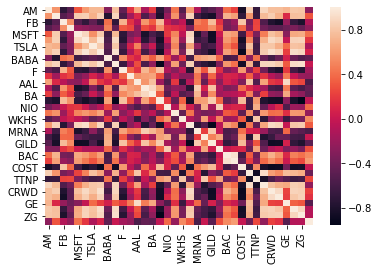

In [16]:
sns.heatmap(df_norm.corr());

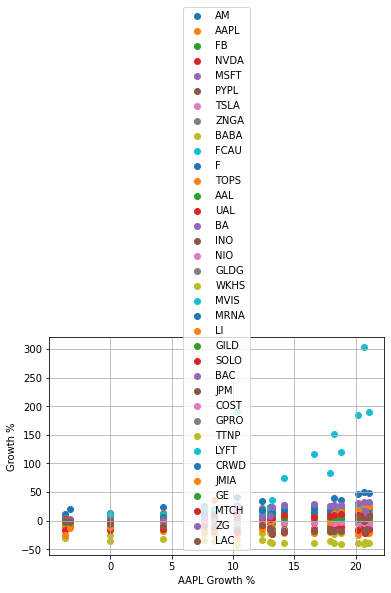

In [17]:
ax= plt.subplot()
for item in df_norm.columns:
    plt.scatter(df_norm.iloc[:,0],df_norm[item])

ax.legend(df_norm.columns)
plt.xlabel('AAPL Growth %')
plt.ylabel('Growth %')
ax.grid(True)

## Calculate percent and absolute estimate and bounds of Growth 

### Create a linear regression fit for the data with thrice the standard dev. of obs.-est. to determine the boundaries

<b> Linear Regression object, score and price boundaries for each listing </b>

In [18]:
def lin_obj(df):
    df_lin=df.iloc[0:1,:]
    df_lin.reindex(['fit_obj','score','bound'])
    df_lin.drop(index=df_lin.index[0],inplace=True)
    for item in df_lin.columns:
        # ... (intercept and coeff.) of the fits
        X=np.array(pd.to_numeric(df.index)).reshape(-1, 1)
        Y=(df[item].values).reshape(-1, 1)
        lin_list_coeff=[]
        lin_list_intercept=[]
        for i in range(0,1):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0)
            lin_obj=LinearRegression()
            lin_obj.fit(X_train,y_train)
            lin_list_coeff.append(lin_obj.coef_)
            lin_list_intercept.append(lin_obj.intercept_)
        linobj = LinearRegression()
        linobj.coef_=np.array(np.array(lin_list_coeff).mean()).reshape(-1)
        linobj.intercept_=np.array(np.array(lin_list_intercept).mean()).reshape(-1)
        score=linobj.score(X,Y)
        df_lin.loc['fit_obj',item]=linobj
        df_lin.loc['score',item]=score

    # Calculate price bounds
    df_est=pd.DataFrame()
    df_est.rename_axis(index='Datetime')
    df_est['Datetime']=df.index
    df_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_lin.loc['fit_obj',item]
        for datetime in df_est.index:
            est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            df_est.loc[datetime,'{}'.format(item)]=est
    for item in df.columns:
        df_diff=df[item]-df_est[item]
        bounds=3*df_diff.std()
        df_lin.loc['bound',item]=bounds
        
    return df_lin

Convert rise and fall from % to price (using price change= percent change/100*start price) and display.<br>

In [19]:
# Call lin_obj(...) to create the price estimation object dataframe
df_price_est_obj=lin_obj(df_norm)
df_price_bounds_dict={}
for item in df_norm.columns:
    df_price_bounds_dict[item]=df_price_est_obj.loc['bound',item]*df_start.loc['start_price',item]/100
df_price_bounds=pd.DataFrame(df_price_bounds_dict,index=['price_bounds'])
df_price_est_obj=df_price_est_obj.append(df_price_bounds)
df_price_est_obj

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM,COST,GPRO,TTNP,LYFT,CRWD,JMIA,GE,MTCH,ZG,LAC
fit_obj,"LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr..."
score,0.601788,0.833547,0.515158,0.277698,0.577173,0.780783,0.671,0.857742,0.510977,0.920128,0.485538,0.0210606,0.0714706,0.305406,0.0460514,0.899868,0.0761163,0.261238,0.195495,0.75573,0.301839,0.603004,0.705368,0.129466,0.398455,0.238494,0.69181,0.495827,0.483713,0.751279,0.862169,0.689982,0.0968958,0.756132,0.872059,0.00748231
bound,15.8131,5.06709,4.33997,4.05655,3.75103,7.43833,9.98637,8.95874,9.95615,4.29147,3.98187,29.839,20.2273,12.3021,11.4032,7.52347,15.5464,10.1977,17.2439,127.52,28.6818,12.1776,3.40781,15.2311,4.60632,4.44676,2.95072,16.4907,23.5182,14.5328,18.9156,23.0244,8.93199,5.82056,13.7384,27.9705
price_bounds,1.10217,5.90772,12.0569,21.5116,8.07335,15.7239,58.4962,0.737305,27.5268,0.678911,0.361952,0.364035,3.03005,5.57285,24.688,0.922377,8.39504,0.219251,4.68689,2.93297,36.4345,4.80773,2.02281,1.25961,1.3271,5.39036,11.1678,1.18074,1.26998,5.6736,28.5304,8.49371,0.928073,8.12725,15.1947,3.2222


### Estimate the price and bounds vs. date using the fit object

In [20]:
# Function to estimate the price given the price dataframe, fit objects and datetime query
def price_est(df,df_price_est_obj,df_strt,datetime_query):
    df_price_est=pd.DataFrame()
    df_price_est.rename_axis(index='Datetime')
    df_price_est['Datetime']=pd.to_datetime(datetime_query)
    df_price_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_price_est_obj.loc['fit_obj',item]
        for datetime in df_price_est.index:
            norm_price_est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            price_est=norm_price_est*df_strt.loc['start_price',item]/100+df_strt.loc['start_price',item]
            df_price_est.loc[datetime,'{}'.format(item)]=price_est
            df_price_est.loc[datetime,'{}_low'.format(item)]=price_est-(df_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_high'.format(item)]=price_est+(df_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_lo_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_low'.format(item)]].mean()
            df_price_est.loc[datetime,'{}_hi_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_high'.format(item)]].mean()
    df_price_est.reindex(df_price_est.index.date)
    df_price_est=df_price_est
    return df_price_est


## What is the predicted share price?

In [21]:
df_price_est=price_est(df,df_price_est_obj,df_start,datetime_query)
df_price_est.head().style.background_gradient(axis=1).format("{:.0f}")

,AM,AM_low,AM_high,AM_lo_mid,AM_hi_mid,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,ZNGA,ZNGA_low,ZNGA_high,ZNGA_lo_mid,ZNGA_hi_mid,BABA,BABA_low,BABA_high,BABA_lo_mid,BABA_hi_mid,FCAU,FCAU_low,FCAU_high,FCAU_lo_mid,FCAU_hi_mid,F,F_low,F_high,F_lo_mid,F_hi_mid,TOPS,TOPS_low,TOPS_high,TOPS_lo_mid,TOPS_hi_mid,AAL,AAL_low,AAL_high,AAL_lo_mid,AAL_hi_mid,UAL,UAL_low,UAL_high,UAL_lo_mid,UAL_hi_mid,BA,BA_low,BA_high,BA_lo_mid,BA_hi_mid,INO,INO_low,INO_high,INO_lo_mid,INO_hi_mid,NIO,NIO_low,NIO_high,NIO_lo_mid,NIO_hi_mid,GLDG,GLDG_low,GLDG_high,GLDG_lo_mid,GLDG_hi_mid,WKHS,WKHS_low,WKHS_high,WKHS_lo_mid,WKHS_hi_mid,MVIS,MVIS_low,MVIS_high,MVIS_lo_mid,MVIS_hi_mid,MRNA,MRNA_low,MRNA_high,MRNA_lo_mid,MRNA_hi_mid,LI,LI_low,LI_high,LI_lo_mid,LI_hi_mid,GILD,GILD_low,GILD_high,GILD_lo_mid,GILD_hi_mid,SOLO,SOLO_low,SOLO_high,SOLO_lo_mid,SOLO_hi_mid,BAC,BAC_low,BAC_high,BAC_lo_mid,BAC_hi_mid,JPM,JPM_low,JPM_high,JPM_lo_mid,JPM_hi_mid,COST,COST_low,COST_high,COST_lo_mid,COST_hi_mid,GPRO,GPRO_low,GPRO_high,GPRO_lo_mid,GPRO_hi_mid,TTNP,TTNP_low,TTNP_high,TTNP_lo_mid,TTNP_hi_mid,LYFT,LYFT_low,LYFT_high,LYFT_lo_mid,LYFT_hi_mid,CRWD,CRWD_low,CRWD_high,CRWD_lo_mid,CRWD_hi_mid,JMIA,JMIA_low,JMIA_high,JMIA_lo_mid,JMIA_hi_mid,GE,GE_low,GE_high,GE_lo_mid,GE_hi_mid,MTCH,MTCH_low,MTCH_high,MTCH_lo_mid,MTCH_hi_mid,ZG,ZG_low,ZG_high,ZG_lo_mid,ZG_hi_mid,LAC,LAC_low,LAC_high,LAC_lo_mid,LAC_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-28 00:00:00,9,8,10,8,9,133,128,139,130,136,269,257,282,263,276,522,501,544,512,533,223,215,231,219,227,242,226,258,234,250,676,618,735,647,705,10,9,11,10,11,242,214,269,228,256,18,18,19,18,19,9,9,9,9,9,1,1,2,1,1,17,14,20,15,18,44,39,50,41,47,222,197,246,209,234,10,9,10,9,10,44,36,53,40,49,2,2,3,2,2,21,16,26,19,23,7,4,10,6,9,130,93,166,111,148,29,24,33,26,31,57,55,59,56,58,7,6,8,6,7,30,28,31,29,30,123,118,129,120,126,363,352,374,357,368,9,8,10,8,10,3,2,4,2,3,53,47,58,50,55,224,196,253,210,238,45,37,54,41,49,11,10,12,10,11,156,148,164,152,160,152,137,167,144,159,11,7,14,9,12


## What kind of volatility do the listings have?

## How do we generate our investment portfolio?

### Estimate the price history along with the bounds and plot the history and estimates for each listing

In [22]:
# Datetime history query values
datetime_query_start_end=pd.date_range(start=start,end=end)

In [23]:
# Generate and display estimates (listing, listing_low, listing_high)
df_price_est_start_end=price_est(df,df_price_est_obj,df_start,datetime_query_start_end)
df_price_est_start_end.head().style.format("{:.0f}")

,AM,AM_low,AM_high,AM_lo_mid,AM_hi_mid,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,ZNGA,ZNGA_low,ZNGA_high,ZNGA_lo_mid,ZNGA_hi_mid,BABA,BABA_low,BABA_high,BABA_lo_mid,BABA_hi_mid,FCAU,FCAU_low,FCAU_high,FCAU_lo_mid,FCAU_hi_mid,F,F_low,F_high,F_lo_mid,F_hi_mid,TOPS,TOPS_low,TOPS_high,TOPS_lo_mid,TOPS_hi_mid,AAL,AAL_low,AAL_high,AAL_lo_mid,AAL_hi_mid,UAL,UAL_low,UAL_high,UAL_lo_mid,UAL_hi_mid,BA,BA_low,BA_high,BA_lo_mid,BA_hi_mid,INO,INO_low,INO_high,INO_lo_mid,INO_hi_mid,NIO,NIO_low,NIO_high,NIO_lo_mid,NIO_hi_mid,GLDG,GLDG_low,GLDG_high,GLDG_lo_mid,GLDG_hi_mid,WKHS,WKHS_low,WKHS_high,WKHS_lo_mid,WKHS_hi_mid,MVIS,MVIS_low,MVIS_high,MVIS_lo_mid,MVIS_hi_mid,MRNA,MRNA_low,MRNA_high,MRNA_lo_mid,MRNA_hi_mid,LI,LI_low,LI_high,LI_lo_mid,LI_hi_mid,GILD,GILD_low,GILD_high,GILD_lo_mid,GILD_hi_mid,SOLO,SOLO_low,SOLO_high,SOLO_lo_mid,SOLO_hi_mid,BAC,BAC_low,BAC_high,BAC_lo_mid,BAC_hi_mid,JPM,JPM_low,JPM_high,JPM_lo_mid,JPM_hi_mid,COST,COST_low,COST_high,COST_lo_mid,COST_hi_mid,GPRO,GPRO_low,GPRO_high,GPRO_lo_mid,GPRO_hi_mid,TTNP,TTNP_low,TTNP_high,TTNP_lo_mid,TTNP_hi_mid,LYFT,LYFT_low,LYFT_high,LYFT_lo_mid,LYFT_hi_mid,CRWD,CRWD_low,CRWD_high,CRWD_lo_mid,CRWD_hi_mid,JMIA,JMIA_low,JMIA_high,JMIA_lo_mid,JMIA_hi_mid,GE,GE_low,GE_high,GE_lo_mid,GE_hi_mid,MTCH,MTCH_low,MTCH_high,MTCH_lo_mid,MTCH_hi_mid,ZG,ZG_low,ZG_high,ZG_lo_mid,ZG_hi_mid,LAC,LAC_low,LAC_high,LAC_lo_mid,LAC_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-27 00:00:00,7,6,8,6,8,118,112,124,115,121,284,272,296,278,290,538,516,559,527,549,212,204,220,208,216,207,192,223,199,215,579,521,638,550,608,8,7,9,8,8,275,247,302,261,288,16,15,16,15,16,9,9,10,9,9,1,1,2,1,1,16,13,19,14,17,48,43,54,46,51,228,203,253,216,240,13,12,14,12,13,47,39,56,43,51,2,2,2,2,2,24,19,28,21,26,1,-2,4,-0,3,157,121,194,139,176,36,31,40,33,38,61,59,63,60,62,7,6,9,7,8,28,27,30,28,29,120,114,125,117,122,382,371,393,377,388,8,7,9,7,8,4,3,6,4,5,41,35,47,38,44,141,113,170,127,155,30,22,39,26,35,11,10,12,10,11,139,131,148,135,144,106,91,121,98,113,10,7,14,9,12
2020-11-28 00:00:00,7,6,8,7,8,119,113,124,116,122,283,271,296,277,289,537,516,559,527,548,212,204,220,208,216,208,193,224,201,216,582,524,641,553,611,8,7,9,8,8,274,246,301,260,287,16,15,16,15,16,9,9,10,9,9,1,1,2,1,1,16,13,19,14,17,48,43,54,46,51,228,203,252,215,240,13,12,14,12,13,47,39,56,43,51,2,2,2,2,2,23,19,28,21,26,1,-2,4,-0,3,157,120,193,138,175,35,31,40,33,38,61,59,63,60,62,7,6,9,7,8,28,27,30,28,29,120,114,125,117,122,382,370,393,376,387,8,7,9,7,8,4,3,5,4,5,41,36,47,39,44,144,115,172,130,158,31,22,39,27,35,11,10,12,10,11,140,132,148,136,144,107,92,122,100,115,10,7,14,9,12
2020-11-29 00:00:00,7,6,8,7,8,119,113,125,116,122,283,271,295,277,289,537,515,558,526,548,212,204,220,208,216,210,194,225,202,217,585,527,644,556,615,8,7,9,8,9,273,245,300,259,286,16,15,16,15,16,9,9,10,9,9,1,1,2,1,1,16,13,19,14,17,48,43,54,45,51,227,203,252,215,240,13,12,13,12,13,47,39,55,43,51,2,2,2,2,2,23,19,28,21,26,2,-1,4,0,3,156,119,192,137,174,35,30,40,33,38,61,59,63,60,62,7,6,9,7,8,28,27,30,28,29,120,114,125,117,123,381,370,392,375,387,8,7,9,7,8,4,3,5,4,5,42,36,48,39,45,147,118,175,132,161,31,23,40,27,36,11,10,12,10,11,141,132,149,136,145,109,94,124,101,116,10,7,14,9,12
2020-11-30 00:00:00,7,6,8,7,8,120,114,125,117,123,283,270,295,277,289,536,515,558,526,547,213,205,221,209,217,211,195,226,203,219,588,530,647,559,618,8,8,9,8,9,271,244,299,258,285,16,15,17,15,16,9,9,10,9,9,1,1,2,1,1,16,13,19,14,17,48,43,54,45,51,227,203,252,215,240,12,12,13,12,13,47,39,55,43,51,2,2,2,2,2,23,19,28,21,26,2,-1,5,0,3,155,118,191,137,173,35,30,40,32,37,61,59,63,60,62,7,6,9,7,8,29,27,30,28,29,120,115,125,117,123,380,369,391,

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


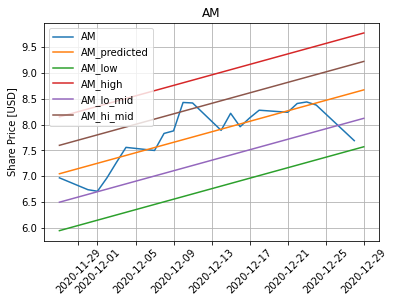

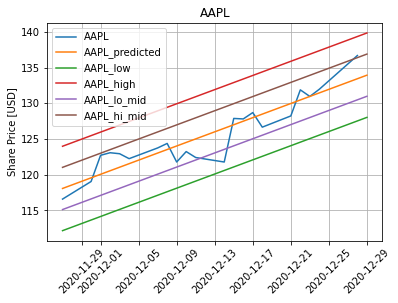

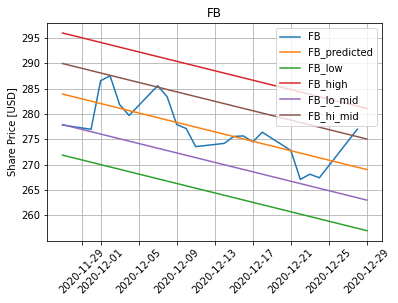

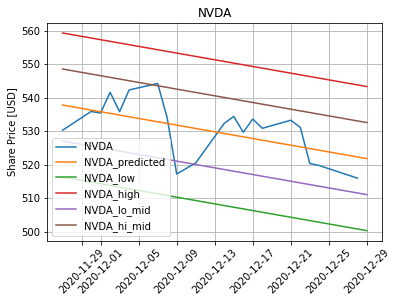

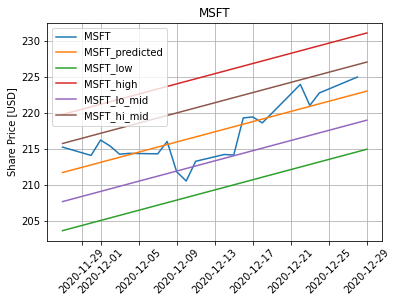

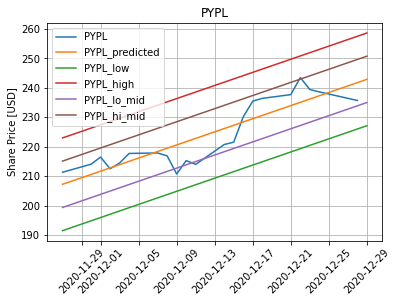

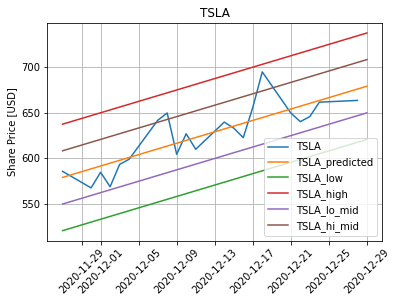

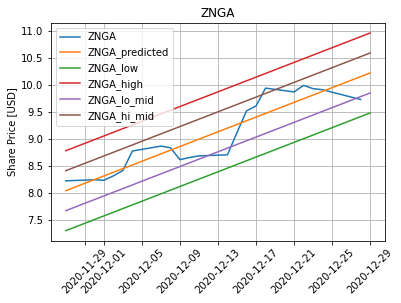

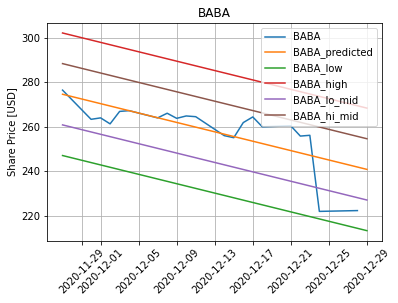

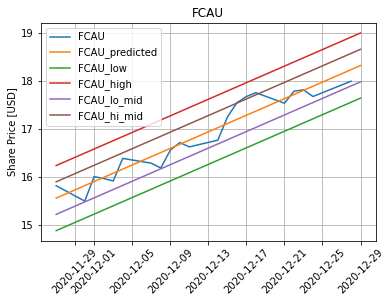

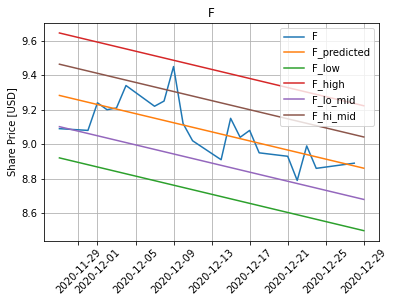

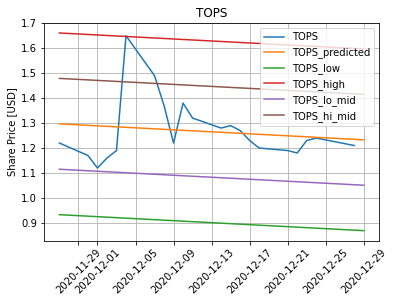

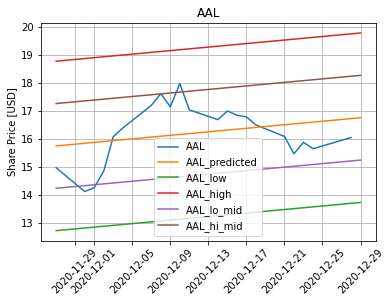

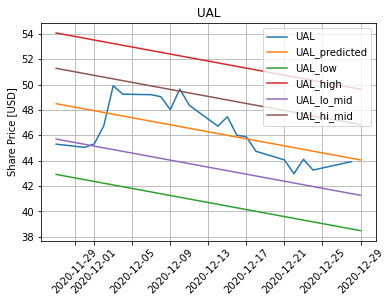

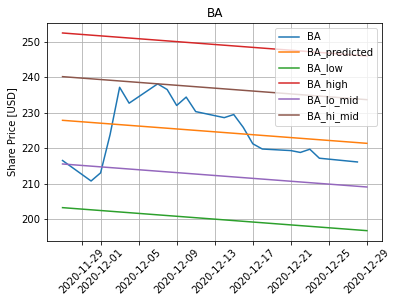

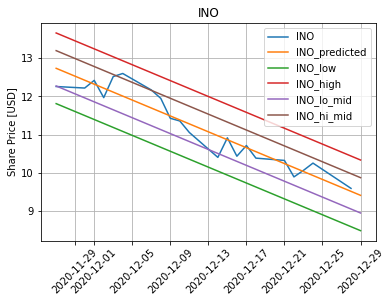

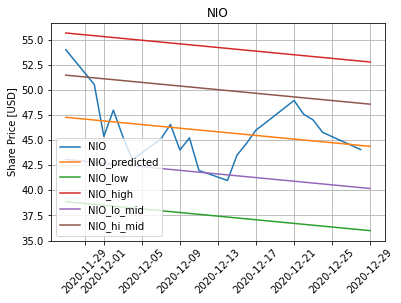

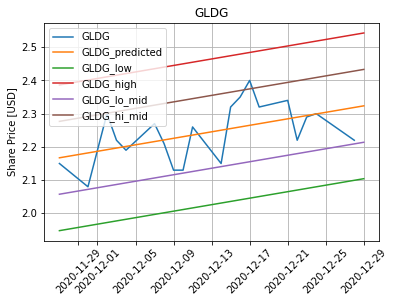

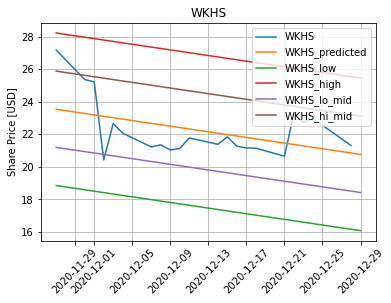

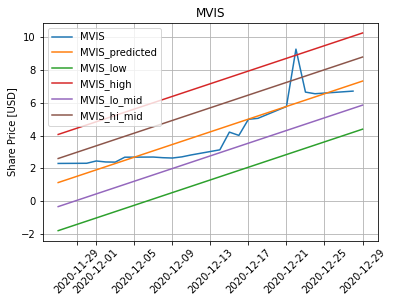

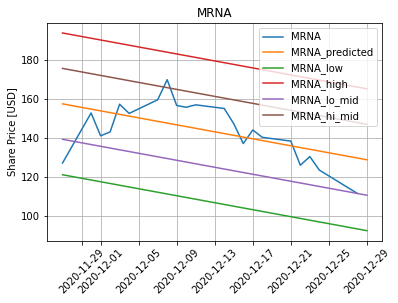

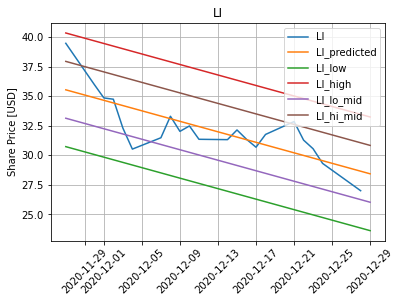

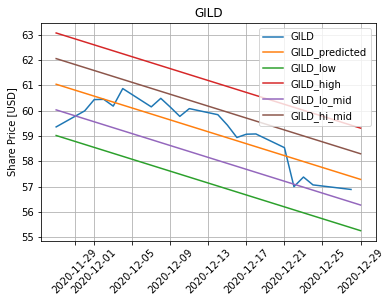

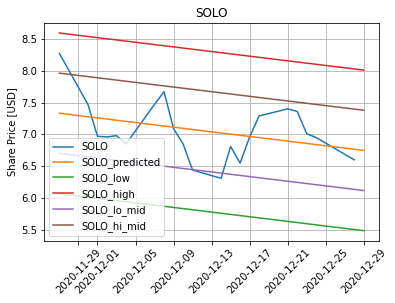

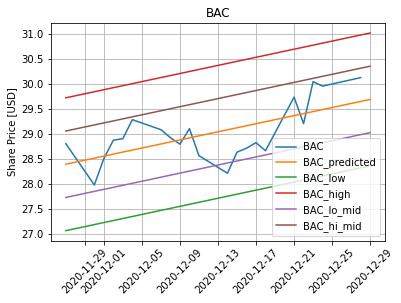

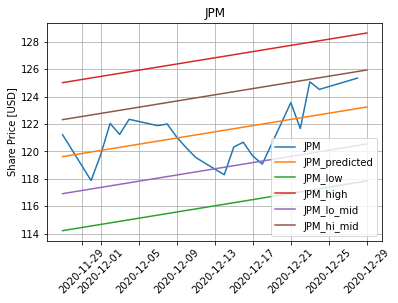

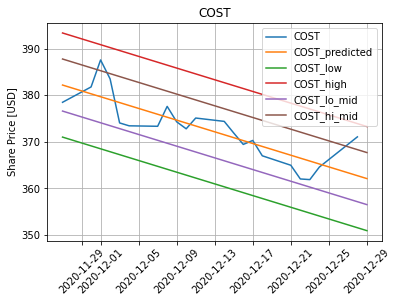

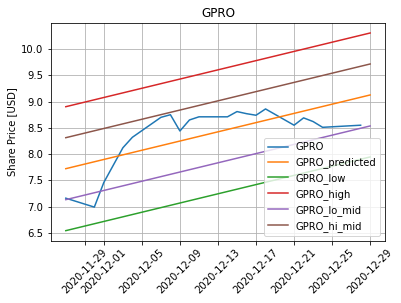

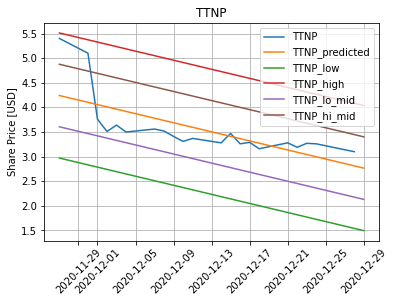

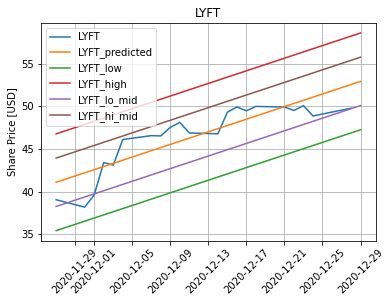

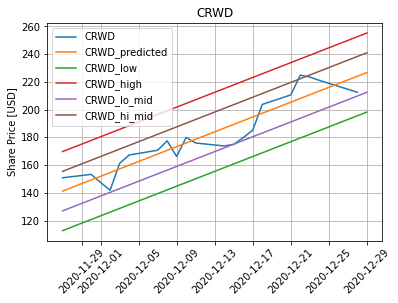

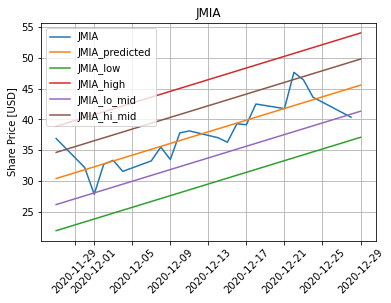

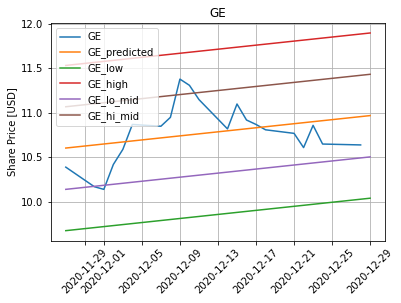

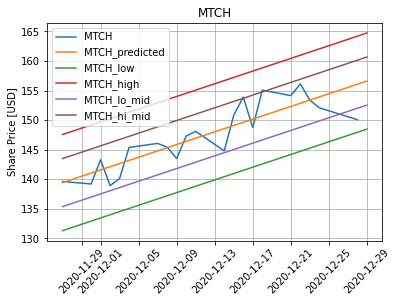

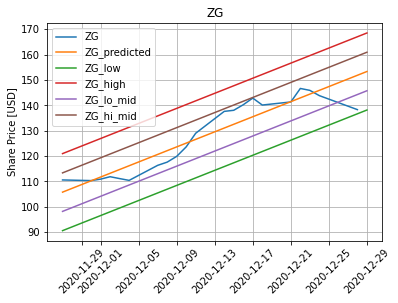

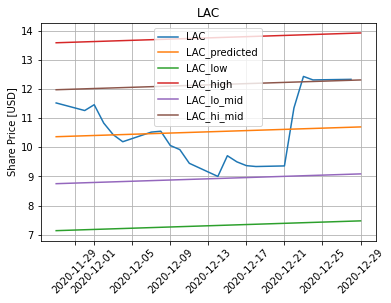

In [24]:
# Plot Open price vs. Time
num_plot=len(df.columns)
i=1
for item in df.columns:
    plt.figure()
    plt.plot(df_price[item])
    plt.plot(df_price_est_start_end[[item,item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid']])
    plt.legend([item,item+'_predicted',item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid'])
    plt.ylabel('Share Price [USD]')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.title(item)
    i=i+1

## Constructing the Portfolio

In order to balance the investments, we'd want to have the most benefit (reward) while minimizing volatility (risk).<br>
1. We can consider 'reward' to be the slope of the linear fit to share price (higher the slope, higher the gain).<br>
2. We can consider 'risk' to be the ratio between the price bounds and change in price over the duration of interest <br>
3. Hence we can compute a 'returns ratio' = 'reward'/'risk' for each listing; the higher this value, the more this investment is viable. <br>
4. Then we can compute the sum of the returns ratios for each listing and divide the returns ratio by the summed value, to determine the "weight" of each investment <br>
5. Finally we can multiply the "weight" by the total investment capital (total_investment) to obtain the recommended investment for each listing <br>    

### Use the Linear Regression object to construct the reward, volatility, returns ratio, weight and suggested investment values

In [25]:
# Initialize the portfolio dataframe df_portfolio and update the index suitably
df_portfolio=df_price_est_obj
df_portfolio=df_portfolio.reindex(['reward','risk','returns_ratio','weight','suggested_investment'])
df_portfolio=df_portfolio.rename_axis(index='Parameters')

# Update "reward" using the slope of the line fit (multiplied by a suitable factor for display)
for item in (df_portfolio.columns):
    df_portfolio.loc['reward',item]=(df_price_est_obj.loc['fit_obj',item].coef_[0])*10**17
    
# Update the "volatility" as the percent price bound
for item in (df_portfolio.columns):
    df_portfolio.loc['risk',item]=(df_price_est_obj.loc['bound',item])
                                         
# Update the returns ratio as the ratio between the "reward" and "volatility"
for item in (df_portfolio.columns):
    df_portfolio.loc['returns_ratio',item]=(df_portfolio.loc['reward',item]/
                                            df_portfolio.loc['risk',item])
    
# Remove those listings with negative returns_ratio since those imply a falling stock
df_price_est_end=price_est(df,df_price_est_obj,df_start,[df.index[-1].strftime('%m/%d/%y')])
for item in df_portfolio.columns:
    item_low_str=item+'_low'
    if df_portfolio.loc['reward',item]<=0 or df[item].iloc[-1]<=df_price_est_end[item_low_str].to_numpy()[0]:
        df_portfolio.pop(item)
        
# Obtain the weighted average of the returns ratio for each listing
for item in (df_portfolio.columns):
    df_portfolio.loc['weight',item]=df_portfolio.loc['returns_ratio',item]/df_portfolio.loc['returns_ratio',:].sum()

# Multiply the weight of each listing by the total investment capital to obtain the recommended investment
for item in (df_portfolio.columns):
    df_portfolio.loc['suggested_investment',item]=df_portfolio.loc['weight',item]*total_investment

# Display the portfolio dataframe
df_portfolio.sort_values(axis=1,by='weight',ascending=False).style.background_gradient(axis=1).format("{:.2f}")

,FCAU,ZG,CRWD,ZNGA,AAPL,PYPL,MTCH,MVIS,LYFT,JMIA,TSLA,AM,MSFT,GPRO,BAC,GLDG,JPM,GE,AAL,LAC
Parameters,,,,,,,,,,,,,,,,,,,,
reward,631.88,1555.99,2052.32,954.31,491.90,608.99,444.62,9730.39,1095.71,1490.11,618.69,843.31,190.12,709.44,162.63,263.07,107.96,126.92,243.45,105.35
risk,4.29,13.74,18.92,8.96,5.07,7.44,5.82,127.52,14.53,23.02,9.99,15.81,3.75,16.49,4.61,10.20,4.45,8.93,20.23,27.97
returns_ratio,147.24,113.26,108.50,106.52,97.08,81.87,76.39,76.30,75.40,64.72,61.95,53.33,50.68,43.02,35.31,25.80,24.28,14.21,12.04,3.77
weight,0.12,0.09,0.09,0.08,0.08,0.06,0.06,0.06,0.06,0.05,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.01,0.01,0.00
suggested_investment,810.62,623.53,597.33,586.45,534.46,450.73,420.55,420.09,415.08,356.30,341.08,293.60,279.04,236.85,194.38,142.02,133.66,78.23,66.26,20.74


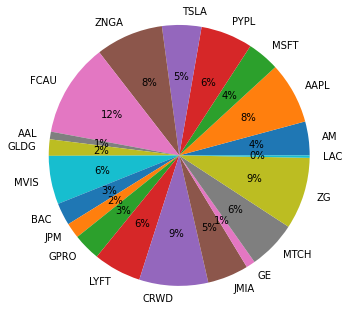

In [26]:
stock_labels=df_portfolio.columns
values=df_portfolio.loc['suggested_investment',:]
plt.pie(values, labels=stock_labels,radius=1.5, autopct='%1.0f%%');

In [27]:
df_portfolio.to_csv('portfolio.csv')

### What kind of volatility do the listings have?

 Refer the "volatility" row, higher the value, greater the volatility

### How do we use the data to construct our portfolio?

Refer the dataframe "df_portfolio"